<a href="https://colab.research.google.com/github/shannonyanes/IS4487/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 7 with the *SuperStore Retail Orders* dataset

In this lab, your assignment is to do a regression model to predict sales revenue.  You can focus your efforts on predicting sales by month and product line.  

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab12_retailer_tune_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [29]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl
from matplotlib import pyplot as plt
from datetime import datetime
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders.csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Create any needed variables, such as month of year and total_amount.  
- Filter out any incomplete orders

In [ ]:
#number conversion

In [3]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [46]:
dfclean['year'] = dfclean['order_date'].dt.year

In [47]:
dfclean.dropna(subset=['year'], inplace=True)

In [4]:
df['order_year_month']= pd.to_datetime(df['order_date'], errors='coerce')

In [36]:
dfclean['month'] = dfclean['order_year_month'].dt.month

In [39]:
dfclean.dropna(subset=['month'], inplace=True)

In [ ]:
#filter records

In [13]:

dfclean = df[(df['quantity'] < 100000) & (df['product_price'] < 2000)]

In [12]:

dfclean['quantity'] = df['quantity'].fillna(df['quantity'].median())

In [20]:
dfclean = df.copy()
dfclean['total_amount'] = dfclean['product_price'] * dfclean['quantity']

In [14]:
dfclean = df.dropna()

In [31]:
dfclean.dropna(subset=['total_amount'], inplace=True)

In [18]:
years_to_exclude = [2421, 2029, 1922]

# Filter out rows with specified years
dfclean = df[~df['order_date'].dt.year.isin(years_to_exclude)]

In [40]:
dfclean.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,total_amount,complete_customer_info,season,month
0,51188,2021-07-01,2021-07-01,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,1949.97,1,Summer,7.0
1,51187,2021-07-01,2021-07-01,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,2599.96,1,Summer,7.0
2,51199,2021-07-02,2021-07-02,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,3249.95,1,Summer,7.0
3,51241,2021-07-04,2021-07-04,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,7.0
4,51297,2021-07-08,2021-07-08,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99,649.99,1,Summer,7.0


In [22]:
dfclean['complete_customer_info'] = df.apply(lambda row: 1 if all(row[['customer_name', 'city', 'state_province']].notna()) and all(row[['customer_name', 'city', 'state_province']] != '') else 2, axis=1)


## Visualize Data

➡️ Assignment Tasks
- Create at least 2 plots showing total revenue (quantity * price) by other variables (see Lab 7).

In [ ]:
#plots

In [ ]:
##Seasonaltity

In [23]:
dfclean['season'] = dfclean['order_date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall',
})


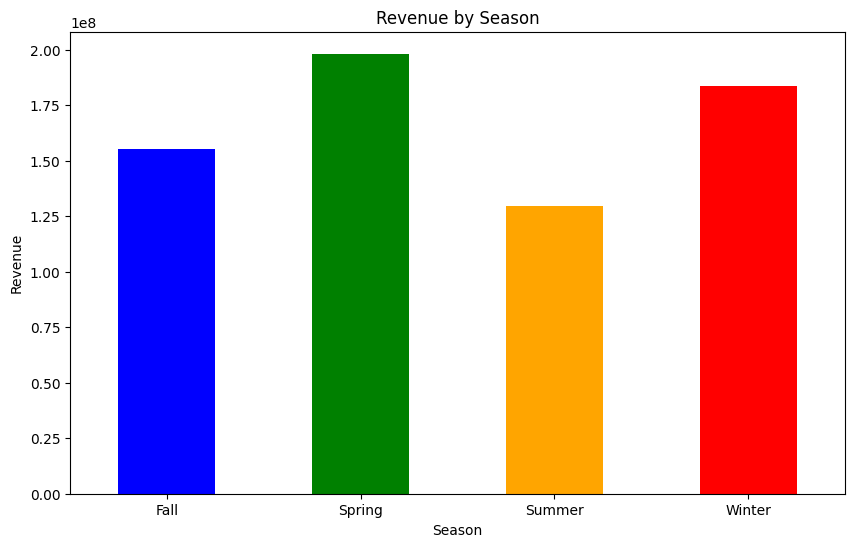

In [24]:

plt.figure(figsize=(10, 6))
dfclean.groupby('season')['total_amount'].sum().plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.title('Revenue by Season')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

In [ ]:
##Revenue by Year

In [26]:
df_filtered = dfclean[dfclean['order_date'].dt.year.isin([2020, 2021, 2022])]

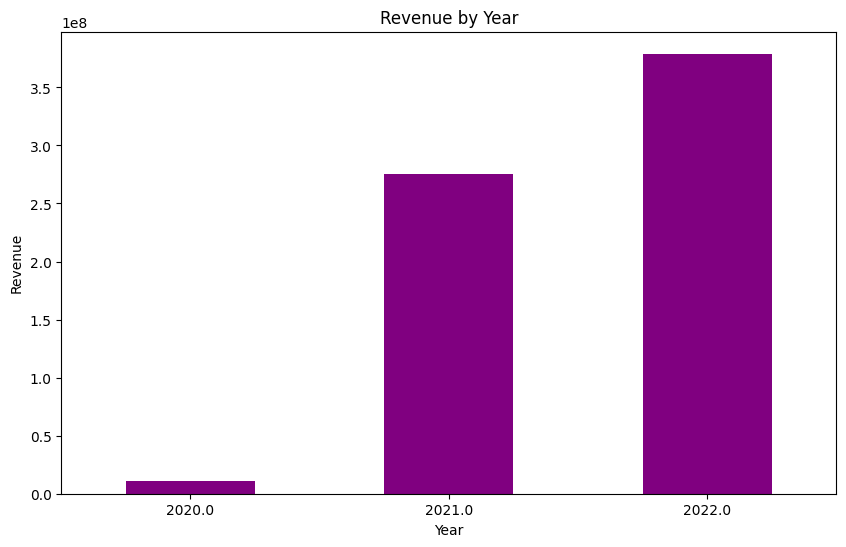

In [27]:
plt.figure(figsize=(10, 6))
dfclean.groupby(df_filtered['order_date'].dt.year)['total_amount'].sum().plot(kind='bar', color='purple')
plt.title('Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.show()

## Regression

For more info on regression models, see: https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use ONLY ONE of the independent variables, such as month of the year
- Output your coefficients

In [ ]:
#create model

In [56]:
X = dfclean[['month']]  # Independent variable (month)
y = dfclean['total_amount']  # Dependent variable (total revenue)

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#display coefficients

In [57]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient:", coefficients[0])
print("Intercept:", intercept)

Coefficient: -54.73182708254542
Intercept: 12256.327159410963


In [58]:
##r^2
r_squared = model.score(X, y)
print("R^2 Score:", r_squared)

R^2 Score: 6.65969078916806e-06


## Regression - Improved

➡️ Assignment Tasks
- create a linear regression to predict the total revenue (quantity * price). Use at least two more independent variables (see varabiables from Lab 7)
- Output your coefficients
- Did your R2 value improve (better fit)?

In [50]:
dfclean['season_num'] = dfclean['order_date'].dt.month.map({
    12: 1, 1: 1, 2: 1,  # Winter
    3: 2, 4: 2, 5: 2,    # Spring
    6: 3, 7: 3, 8: 3,    # Summer
    9: 4, 10: 4, 11: 4   # Fall
})

In [ ]:
#create model

In [51]:
X = dfclean[['month', 'season_num', 'year']]
y = dfclean['total_amount']

In [52]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#display coefficients

In [53]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient:", coefficients[0])
print("Intercept:", intercept)

Coefficient: -80.13232340937036
Intercept: -41208.71726858291


In [54]:
##r^2
r_squared = model.score(X, y)
print("R^2 Score:", r_squared)

R^2 Score: 1.2500823909689096e-05


In [ ]:
#compare models

In [ ]:
##my R^2 score did improve, but for some reason it is still very low and I am not sure why becuase I know all of this varible are indepent

## One-Hot Product

➡️ Assignment Tasks
- Create one-hot/dummy encoding for the product line variable.  Use those new encoded variables for the regression

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          56045 non-null  int64         
 1   order_date        55958 non-null  datetime64[ns]
 2   order_year_month  55958 non-null  datetime64[ns]
 3   customer_name     56045 non-null  object        
 4   city              55571 non-null  object        
 5   state_province    55571 non-null  object        
 6   quantity          56006 non-null  float64       
 7   product_name      56045 non-null  object        
 8   product_line      56045 non-null  object        
 9   product_price     56045 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 4.3+ MB


In [ ]:
#create variable

In [59]:
df_encoded = pd.get_dummies(dfclean, columns=['product_line'], drop_first=True)

In [ ]:
#create model

In [69]:
X = df_encoded[['order_id', 'quantity', 'product_price']]
y = df_encoded['total_amount']

In [70]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
#display coefficients

In [72]:
coefficients = model.coef_
intercept = model.intercept_

print("Coefficient:", coefficients)
print("Intercept:", intercept)

Coefficient: [0.01364604 5.5791907  1.98638713]
Intercept: -1272.4291002486261


In [73]:
##r^2
r_squared = model.score(X, y)
print("R^2 Score:", r_squared)

R^2 Score: 0.9043008041353446
